In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    
    fig = plt.figure(figsize=(12,10))
    ax= fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
def make_cord(img,line_para):
    slp,inter=line_para
    y1=img.shape[0]
    y2=int(y1*(3/5))
    x1= int((y1-inter)/slp)
    x2= int((y2-inter)/slp)
    return np.array([x1,y1,x2,y2])

In [5]:
def avg_slope_intercept(img,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        para = np.polyfit((x1,x2),(y1,y2),1)
        slope = para[0]
        intercept = para[1]
        if slope < 0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    
    if len(left_fit) ==0:
        left_fit_avg = (-1.60834719,1201.39747201)
    else:
        left_fit_avg=np.average(left_fit,axis=0)
    #print(left_fit_avg,'left')
    right_fit_avg=np.average(right_fit,axis=0)
    left_line=make_cord(img,left_fit_avg)
    right_line=make_cord(img,right_fit_avg)
    #print(left_fit,'left')
    #print(right_fit_avg,'right')
    return np.array([left_line,right_line])

In [6]:
def reg_of_int(img):
    height = img.shape[0]
    polygons = np.array([
        [(200,height),(1100,height),(550,250)]
    ],np.int32)
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,polygons,(255,255,255))
    masked_img = cv2.bitwise_and(img,mask)
    return masked_img

In [7]:
def dis_lines(img,lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for  x1,y1,x2,y2 in lines:
            cv2.line(line_img,(x1,y1),(x2,y2),(255,0,0),8)
    return line_img

In [8]:
def cany(img2):
    gray_img = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
    blur1 = cv2.GaussianBlur(gray_img,(5,5),0)
    canny = cv2.Canny(blur1,50,150)
    return canny

In [3]:
img =cv2.imread(r'C:\Users\Yash Prasad\Desktop\jupyter\find_lane\sample\01.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

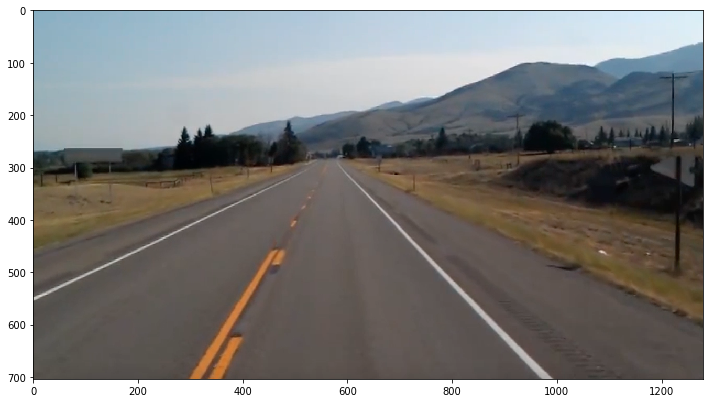

In [4]:
display(img)

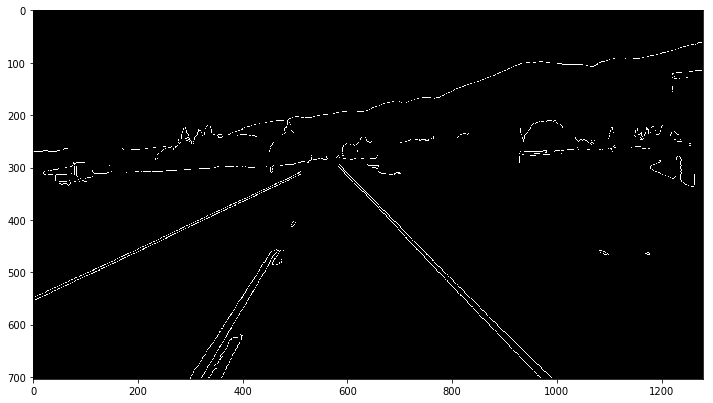

In [19]:
canny = cany(img)
display(canny)

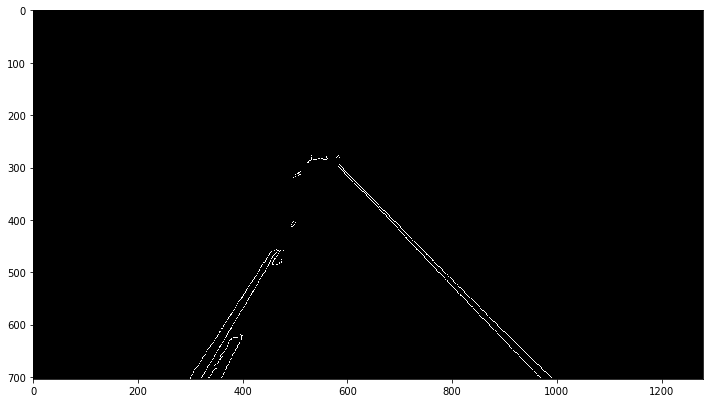

In [20]:
mas = reg_of_int(canny)
display(mas)

In [21]:
lines = cv2.HoughLinesP(mas,2,np.pi/180,100,np.array([]) , minLineLength =40,maxLineGap=5)

In [22]:
avg_lines= avg_slope_intercept(img,lines)

In [23]:
line_img = dis_lines(img,avg_lines)

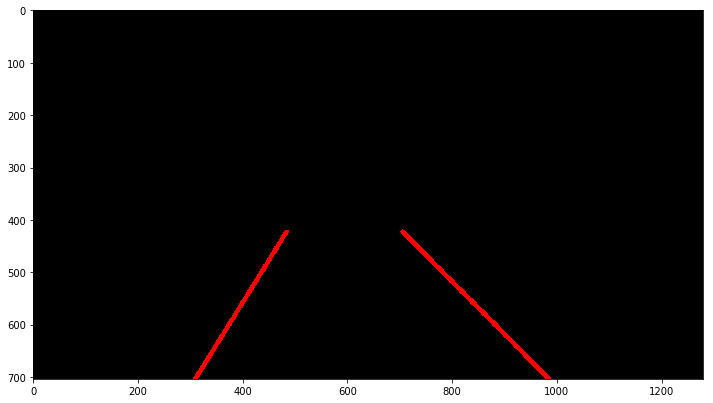

In [24]:
display(line_img)

In [25]:
final_img=cv2.addWeighted(img,0.7,line_img,1,1)

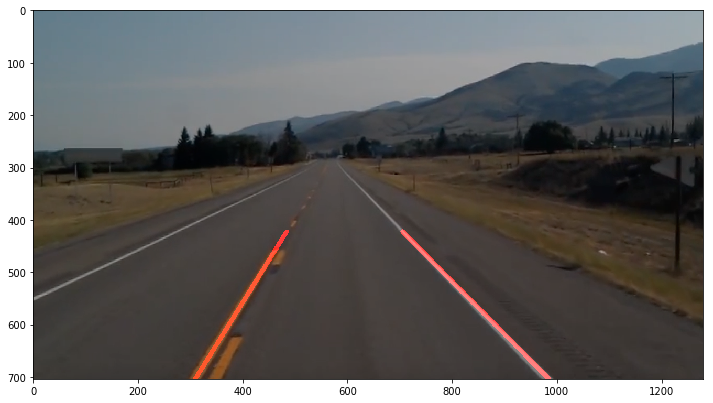

In [26]:
display(final_img)

In [30]:
cap = cv2.VideoCapture(r"C:\Users\Yash Prasad\Desktop\jupyter\find_lane\sample\test2.mp4")
while(cap.isOpened()):
    ret,img = cap.read()
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if ret:
        canny = cany(img)
        mas = reg_of_int(canny)
        lines = cv2.HoughLinesP(mas,2,np.pi/180,100,np.array([]) , minLineLength =40,maxLineGap=5)
        avg_lines= avg_slope_intercept(img,lines)
        line_img = dis_lines(img,avg_lines)
        final_img=cv2.addWeighted(img,0.7,line_img,1,1)
        cv2.imshow("result",final_img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()